In [2]:
import sys
import mrc as Mrc
from tnia.plotting.projections import show_xyz_slice_center, show_xyz_slice
sys.path.insert(1, r'../../python')
from simreconpython.fft_helper import show_centered_fft_magnitude, centered_fft_magnitude
from simreconpython.separate import apodize_z


In [31]:
#reconstructed_name = r'D:\Janelia\Data 2024-06-12\rois_1\roi_64_proc_gApo_0.2_supRbase_1_w_0.001.mrc'
#reconstructed_name = r'D:\\Janelia\\Data 2024-06-12\\rois_1\\roi_128_from_c.mrc'
#reconstructed_name = r'D:\Janelia\Data 2024-06-06\Wiener, gammaApo and SupressR parameter testing\488nm comparison Brian\CELL 4 - 1.0W 300ms updated HWPQWP pos_20240503_115909\488 nm 5 phases 0.81 NA React_All Linear SIM_cam1_1_proc488nmLinOTF0_gApo_0.3_supR_10_w_0.001.mrc'
#reconstructed_name = r'D:\Janelia\Data 2024-06-12\data\561nm WF correlation image 2_20240521_162301\560 nm 655 40 filter 5 phases 0.81 NA React_All Linear SIM_cam1_1_proc_560 201909_19-20_best_gApo_0.2_supR_1.5_w_0.001_tile64_pad32.mrc'
#reconstructed_name = r'D:\Janelia\Data For Brian\Cryo-SIM Scope #2 Data (James System)\Not Anti-reflection coated\Successful samples\CELL 4 - 1.0W 300ms updated HWPQWP\488 nm 5 phases 0.81 NA React_All Linear SIM_cam1_1_proc_OTF_bead_8_tile64_pad32.mrc'
#reconstructed_name = r'D:\Janelia\Data 2024-06-30\488cm cell 5 good signal_20240627_131236  Fail\488 nm 5 phases 0.81 NA React_All Linear SIM_cam1_1_proc_gApo_0.3_supR_10_w_0.001_wl_488_488nmLinOTF0_mask.mrc'
#reconstructed_name = r'D:\Janelia\Data 2024-06-06\Wiener, gammaApo and SupressR parameter testing\488nm comparison Brian\CELL 4 - 1.0W 300ms updated HWPQWP pos_20240503_115909\488 nm 5 phases 0.81 NA React_All Linear SIM_cam1_1_proc_modified_PSF.mrc'
#reconstructed_name = r'D:\Janelia\Data 2024-06-06\Wiener, gammaApo and SupressR parameter testing\488nm comparison Brian\archive\488 nm 5 phases 0.81 NA React_All Linear SIM_cam1_1_proc_modified_PSF.mrc'
reconstructed_name = r"D:\Janelia\Data 2024-06-12\rois_1\roi_128_from_c_model2.mrc"
reconstructed_name = r"D:\Janelia\Data 2024-06-06\Wiener, gammaApo and SupressR parameter testing\488nm comparison Brian\CELL 4 - 1.0W 300ms updated HWPQWP pos_20240503_115909\488 nm 5 phases 0.81 NA React_All Linear SIM_cam1_1_proc_gApo_0.3_supR_10_w_0.1_wl_488_bnPSF4_model.mrc"
reconstructed_name = r"D:\Janelia\Data 2024-06-12\parameter_testing_july15\560 nm 655 40 filter 5 phases 0.81 NA React_All Linear SIM_cam1_1_proc_gApo_0.2_supR_1.0_w_0.001_wl_561_560 201909_19-20_best_t_64_32_tile64_pad32.mrc"

reconstructed_name = r"C:\Users\bnort\work\Janelia\code\cudasirecon\test_data2\out5.mrc"
reconstructed_mrc = Mrc.Mrc(reconstructed_name)
reconstructed = reconstructed_mrc.data

In [32]:
import napari
viewer = napari.Viewer()
viewer.add_image(reconstructed, name='reconstructed')

<Image layer 'reconstructed' at 0x2dea1df4b20>

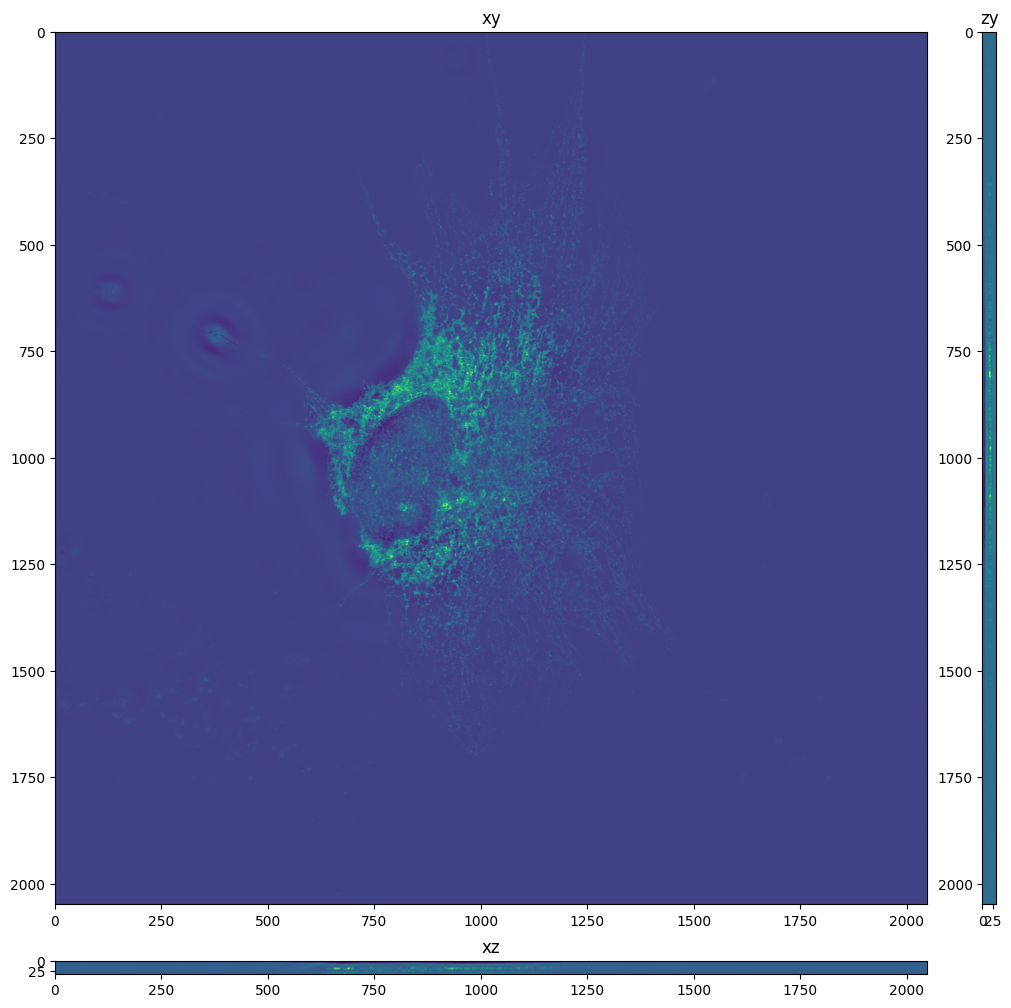

In [33]:
fig = show_xyz_slice_center(reconstructed, sxy=1, sz=2)
#fft = centered_fft_magnitude(reconstructed, True)
#fig = show_xyz_slice(fft, fft.shape[2]//2, fft.shape[1]//2, fft.shape[0]//2, sxy=1, sz=20)


In [15]:
((488/1000)/2/0.81)

0.30123456790123454

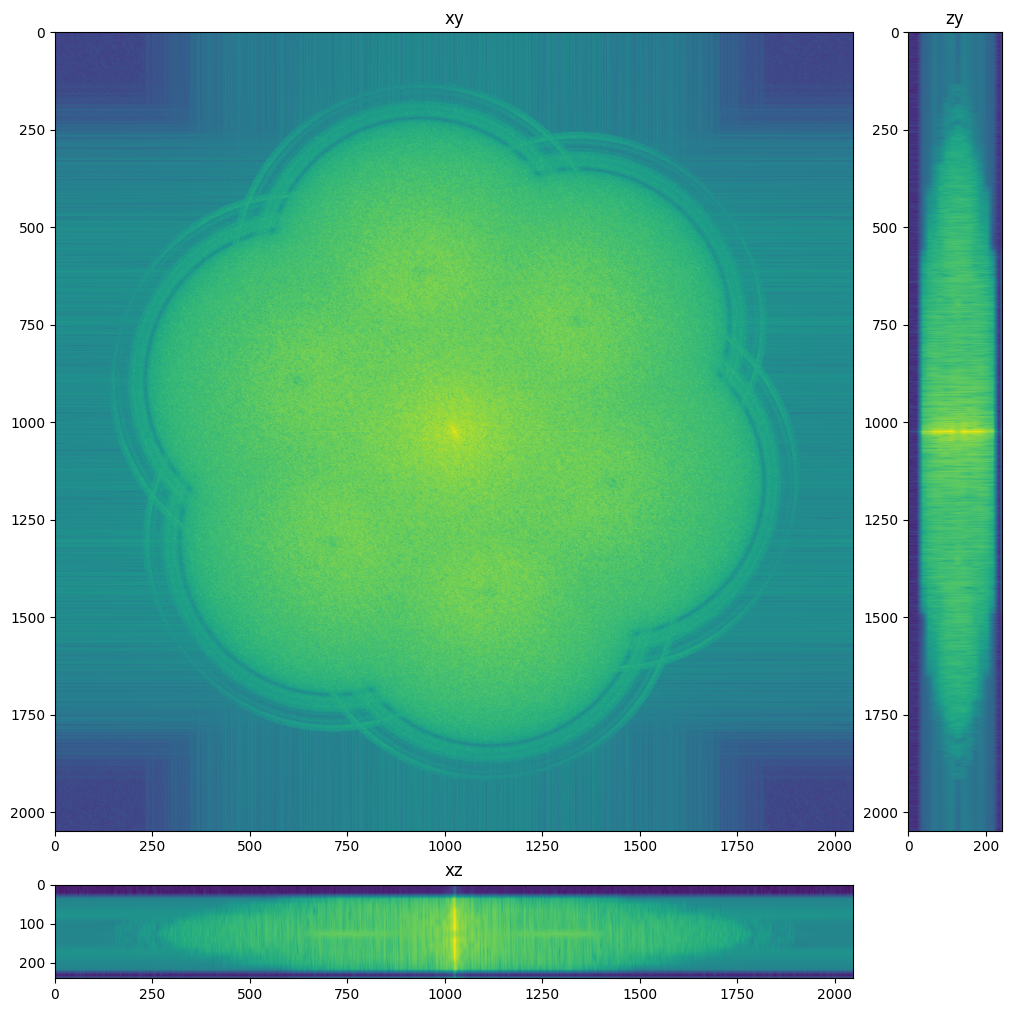

In [34]:
import numpy as np

fft = np.fft.fftn(reconstructed)
fft = np.fft.fftshift(fft)
#from simreconpython.separate import apodize_z
#fft_app = fft[10:fft.shape[0]-10, :,:]
#fft_app = apodize_z(fft_app, 20)
#fft_app = np.pad(fft_app, ((10,10), (0,0), (0,0)), mode='constant', constant_values=0)
#fft_app = np.fft.ifftshift(fft_app)
reconstructed_ = np.fft.ifftn(fft)
reconstructed_ = reconstructed_.real
fft_app_mag = np.abs(fft)
fft_app_mag_log = np.log(fft_app_mag + 1)
fig = show_xyz_slice_center(fft_app_mag_log, sxy=1, sz=15)

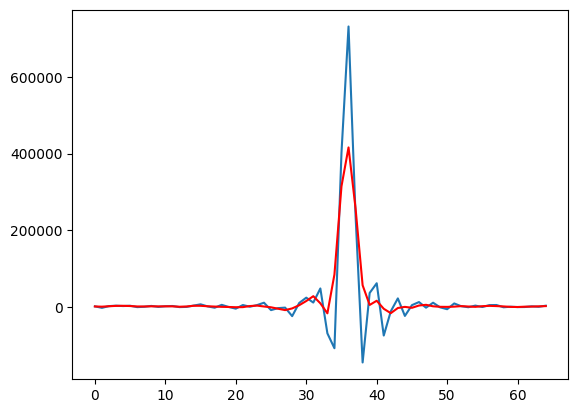

In [38]:
import matplotlib.pyplot as plt

line_profile1 = reconstructed[:, reconstructed.shape[1]//2, reconstructed.shape[2]//2]
line_profile2 = reconstructed_[:, reconstructed_.shape[1]//2, reconstructed_.shape[2]//2]

plt.plot(line_profile1)
plt.plot(line_profile2, 'r')